# SLEEP QUALITY ANALYSIS 


### 1. Data Collections 
Collected data from a dataset titled "Sleep Health and Lifestyle Dataset" available on Kaggle. This dataset contains various health and lifestyle factors related to sleep quality, including age, sex, weight, height, sleep duration, sleep efficiency, sleep quality, and sleep disorder.



### 2. Data Cleaning
Checked for any missing values in the dataset and filled them with the mean value of the respective column. This was done using the `fillna()` function in Pandas.




### 3. Feature Engineering
Split the 'Blood Pressure' column into 'systolic_pressure' and 'diastolic_pressure' for easier analysis.

Converting the 'Gender' column to numerical values using dummy variables.

Creating new columns 'BMI_overweight' and 'BMI_Normal' based on the 'BMI Category' values.

Sleep disorder is considered as yes or no depending on type of sleep_disorder



### 4. Data visualization

Analyzed the correlation using correlation matrix.

Visualized the correlation using scatter plots


### 5. Model Training and selection
Split the dataset into training and testing sets using `train_test_split` from sklearn.

Tried multiple regression models including Linear Regression and Lasso Regression.

Compared the performance of these models using R-squared.




In [1]:
import pandas as pd
import numpy as np

In [82]:
df2 = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df2.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## DATA CLEANING

In [83]:
df2.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [3]:
df.shape

(374, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [6]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna(0)

## CATEGORICAL DATA ANALYSIS

In [7]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,0
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [8]:
df['systolic_pressure'] = df['Blood Pressure'].str.split('/').str[0].astype(int)
df['diastolic_pressure'] = df['Blood Pressure'].str.split('/').str[1].astype(int)
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,systolic_pressure,diastolic_pressure
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,0,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,0,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,0,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95


In [9]:
gender_dummies_df = pd.get_dummies(df['Gender']).astype(int)
gender_dummies_df
df = pd.concat([df, gender_dummies_df], axis=1)
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,systolic_pressure,diastolic_pressure,Female,Male
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,0,126,83,0,1
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,0,125,80,0,1
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,0,125,80,0,1
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,0,1
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,0,1


In [10]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [11]:
# Map Obese and Overweight as one category called BMI_overweight
# Normal and Normal Weight as another category as BMI_Category_Normal
df['BMI_overweight'] = df['BMI Category'].isin(['Overweight', 'Obese']).astype(int)
df['BMI_Normal'] = df['BMI Category'].isin(['Normal', 'Normal Weight']).astype(int)
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,systolic_pressure,diastolic_pressure,Female,Male,BMI_overweight,BMI_Normal
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,0,126,83,0,1,1,0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,0,125,80,0,1,0,1
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,0,125,80,0,1,0,1
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,0,1,1,0
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,0,1,1,0


In [12]:
df['Sleep Disorder'].unique()

array([0, 'Sleep Apnea', 'Insomnia'], dtype=object)

In [13]:
df['Sleep Disorder Status'] = df['Sleep Disorder'].isin(['Sleep Apnea', 'Insomnia']).astype(int)

In [14]:
df['Occupation'].unique().tolist()

['Software Engineer',
 'Doctor',
 'Sales Representative',
 'Teacher',
 'Nurse',
 'Engineer',
 'Accountant',
 'Scientist',
 'Lawyer',
 'Salesperson',
 'Manager']

## DATA VISUALIZATION

In [15]:
df1 = df.copy()
df1.drop(['Gender', 'Person ID', 'BMI Category', 'Blood Pressure', 'Sleep Disorder', 'Occupation'], axis = 1, inplace= True)
df1.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,systolic_pressure,diastolic_pressure,Female,Male,BMI_overweight,BMI_Normal,Sleep Disorder Status
0,27,6.1,6,42,6,77,4200,126,83,0,1,1,0,0
1,28,6.2,6,60,8,75,10000,125,80,0,1,0,1,0
2,28,6.2,6,60,8,75,10000,125,80,0,1,0,1,0
3,28,5.9,4,30,8,85,3000,140,90,0,1,1,0,1
4,28,5.9,4,30,8,85,3000,140,90,0,1,1,0,1


In [16]:
df1.shape

(374, 14)

In [17]:
df1.isnull().sum()

Age                        0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
Heart Rate                 0
Daily Steps                0
systolic_pressure          0
diastolic_pressure         0
Female                     0
Male                       0
BMI_overweight             0
BMI_Normal                 0
Sleep Disorder Status      0
dtype: int64

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      374 non-null    int64  
 1   Sleep Duration           374 non-null    float64
 2   Quality of Sleep         374 non-null    int64  
 3   Physical Activity Level  374 non-null    int64  
 4   Stress Level             374 non-null    int64  
 5   Heart Rate               374 non-null    int64  
 6   Daily Steps              374 non-null    int64  
 7   systolic_pressure        374 non-null    int64  
 8   diastolic_pressure       374 non-null    int64  
 9   Female                   374 non-null    int64  
 10  Male                     374 non-null    int64  
 11  BMI_overweight           374 non-null    int64  
 12  BMI_Normal               374 non-null    int64  
 13  Sleep Disorder Status    374 non-null    int64  
dtypes: float64(1), int64(13)
m

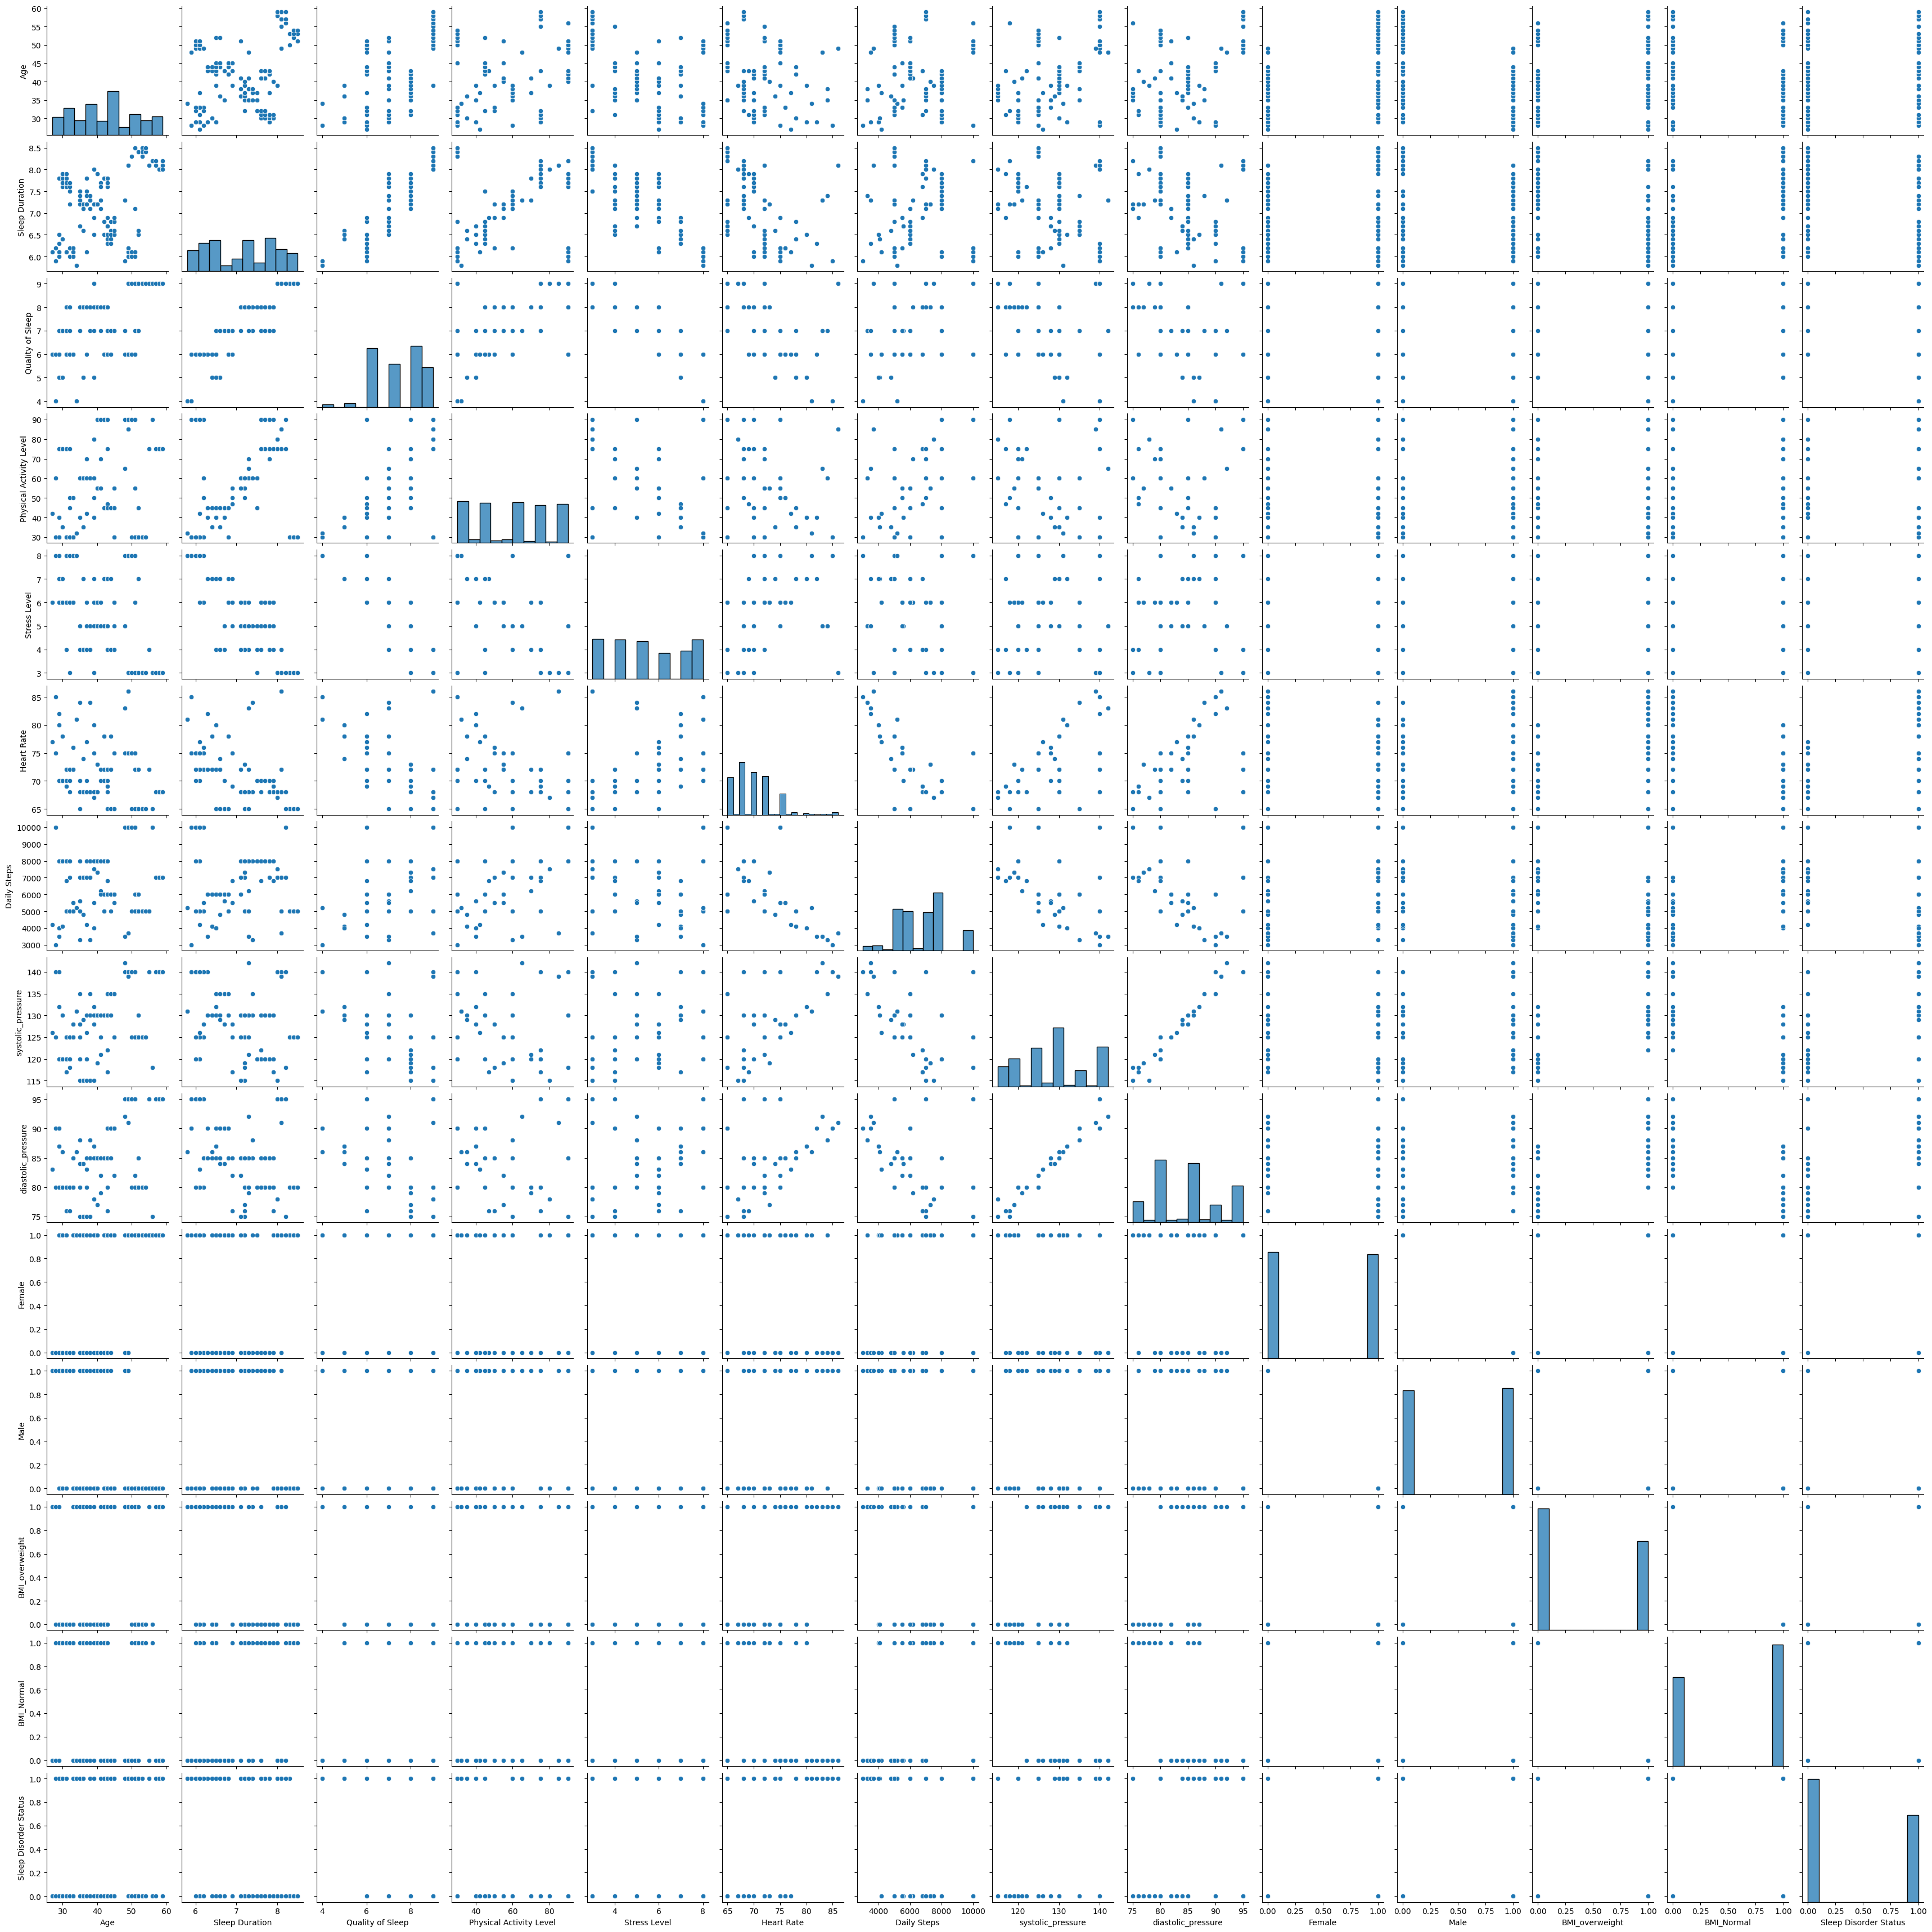

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.pairplot(df1)
plt.show()

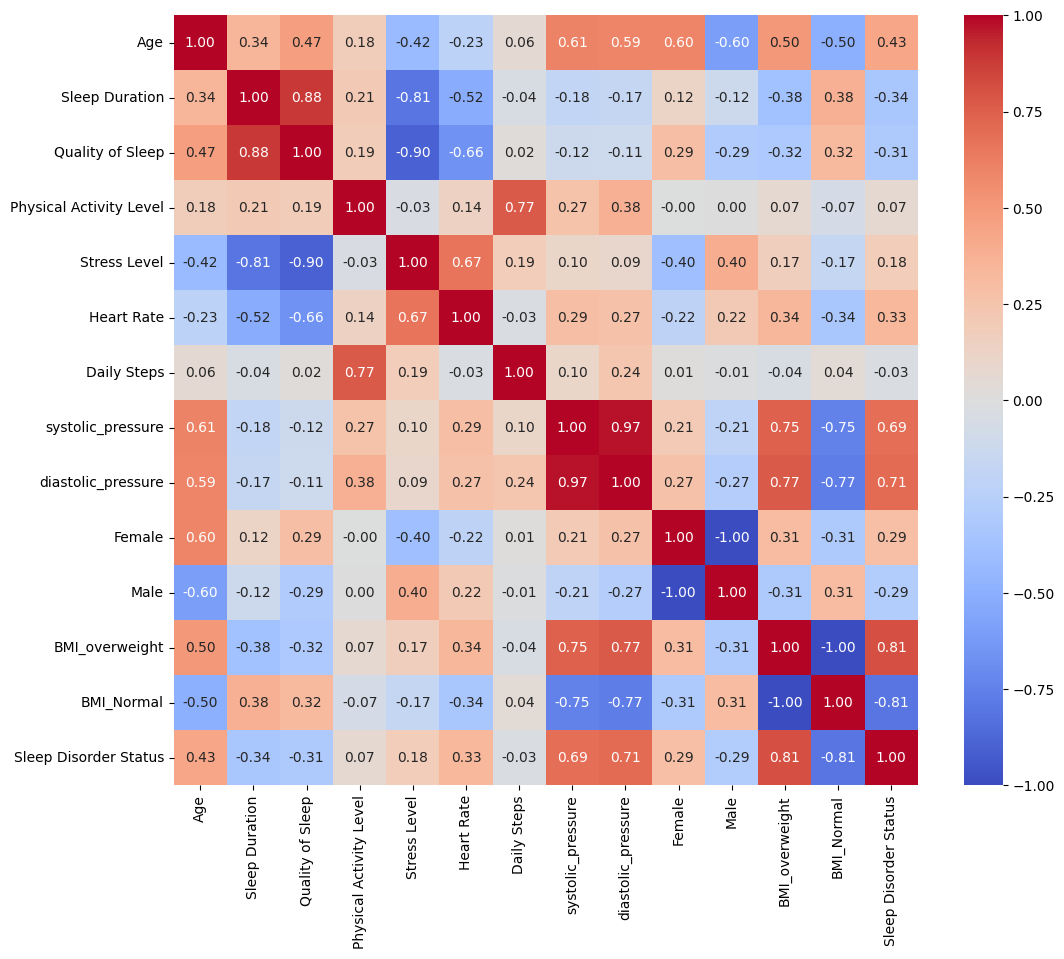

In [35]:
# Calculate the correlation matrix
plt.figure(figsize=(12, 10))
cor = df1.corr()
sns.heatmap(cor, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0)
plt.show()


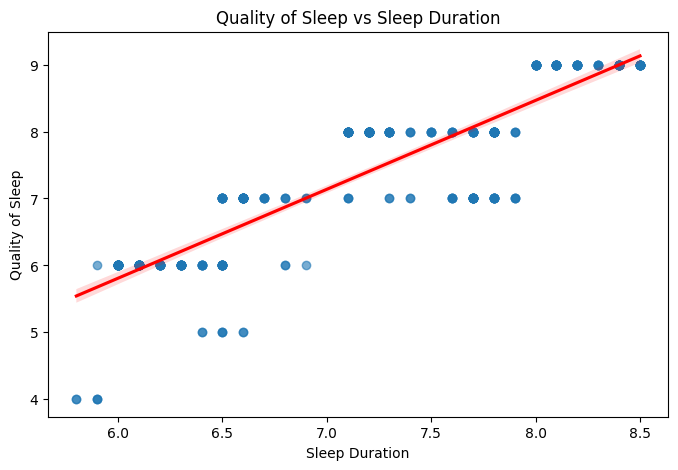

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot with a regression line for Quality of Sleep vs. Sleep Duration
plt.figure(figsize=(8, 5))
sns.regplot(x='Sleep Duration', y='Quality of Sleep', data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Quality of Sleep vs Sleep Duration')
plt.xlabel('Sleep Duration')
plt.ylabel('Quality of Sleep')
plt.show()


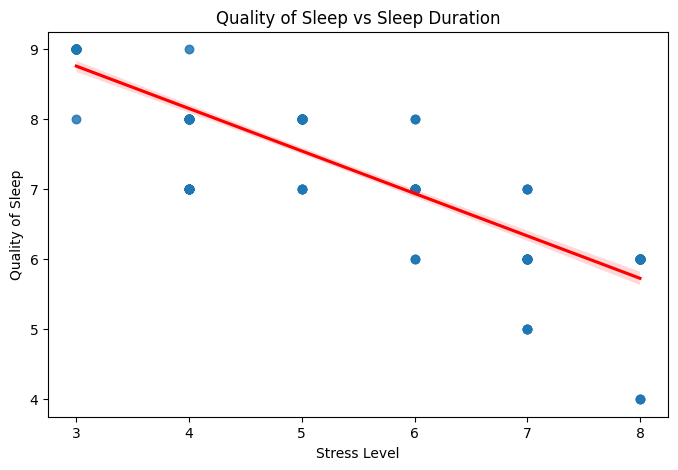

In [41]:
plt.figure(figsize=(8, 5))
sns.regplot(x='Stress Level', y='Quality of Sleep', data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Quality of Sleep vs Stress level')
plt.xlabel('Stress Level')
plt.ylabel('Quality of Sleep')
plt.show()


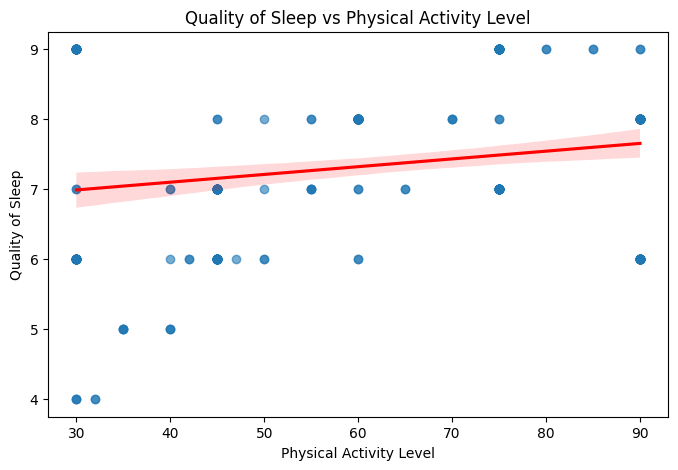

In [46]:
plt.figure(figsize=(8, 5))
sns.regplot(x='Physical Activity Level', y='Quality of Sleep', data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Quality of Sleep vs Physical Activity Level')
plt.xlabel('Physical Activity Level')
plt.ylabel('Quality of Sleep')
plt.show()

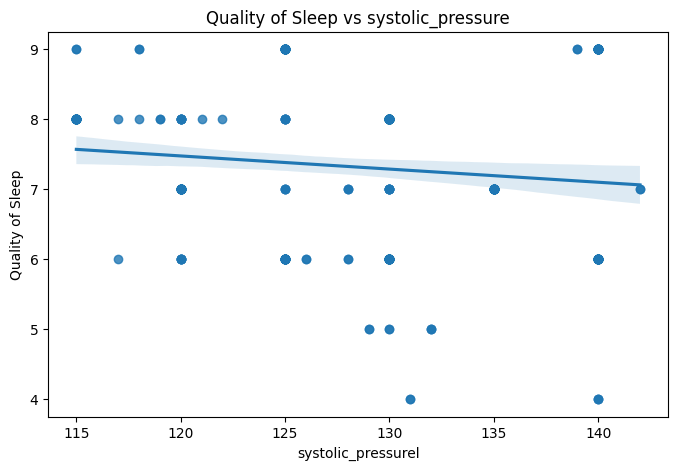

In [62]:
# systolic_pressure', 'diastolic_pressure', 

plt.figure(figsize=(8, 5))
sns.regplot(x='systolic_pressure', y='Quality of Sleep', data=df)
plt.title('Quality of Sleep vs systolic_pressure')
plt.xlabel('systolic_pressurel')
plt.ylabel('Quality of Sleep')
plt.show()

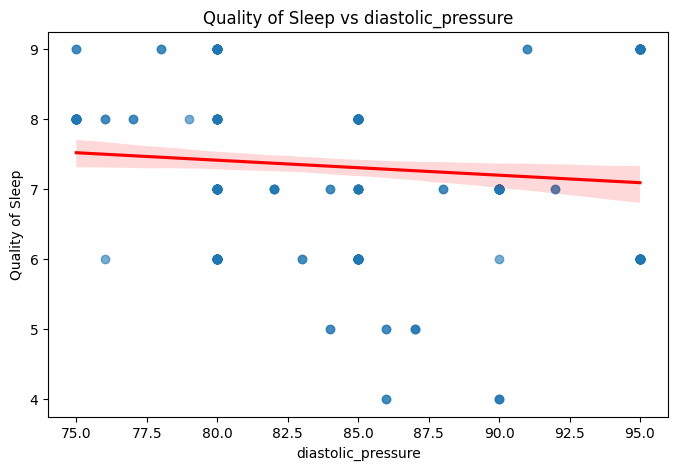

In [45]:
plt.figure(figsize=(8, 5))
sns.regplot(x='diastolic_pressure', y='Quality of Sleep', data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Quality of Sleep vs diastolic_pressure')
plt.xlabel('diastolic_pressure')
plt.ylabel('Quality of Sleep')
plt.show()

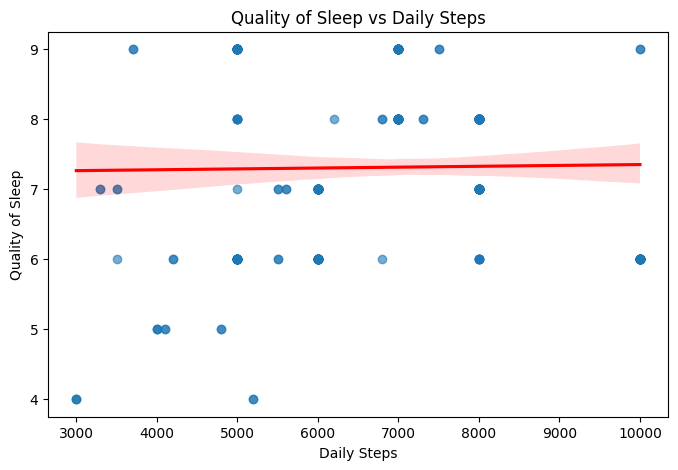

In [49]:
plt.figure(figsize=(8, 5))
sns.regplot(x='Daily Steps', y='Quality of Sleep', data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Quality of Sleep vs Daily Steps')
plt.xlabel('Daily Steps')
plt.ylabel('Quality of Sleep')
plt.show()

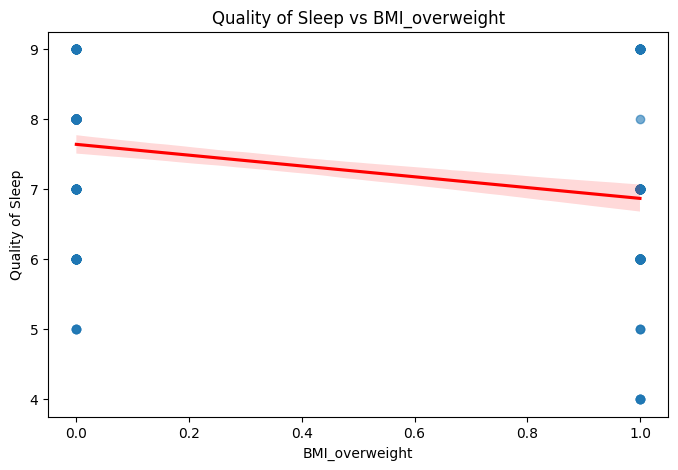

In [50]:
plt.figure(figsize=(8, 5))
sns.regplot(x='BMI_overweight', y='Quality of Sleep', data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Quality of Sleep vs BMI_overweight')
plt.xlabel('BMI_overweight')
plt.ylabel('Quality of Sleep')
plt.show()

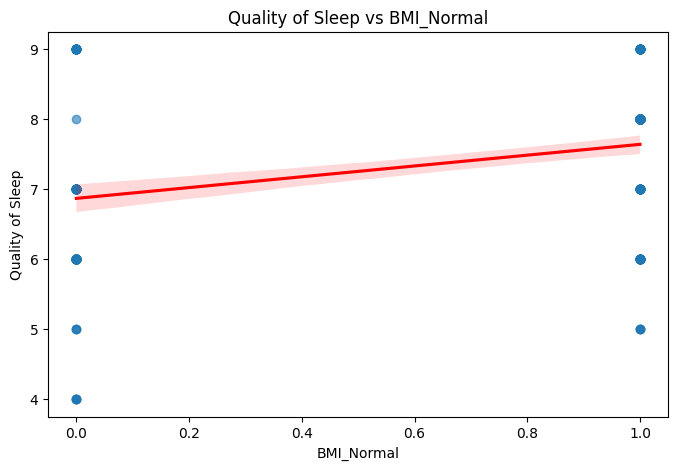

In [51]:
plt.figure(figsize=(8, 5))
sns.regplot(x='BMI_Normal', y='Quality of Sleep', data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Quality of Sleep vs BMI_Normal')
plt.xlabel('BMI_Normal')
plt.ylabel('Quality of Sleep')
plt.show()

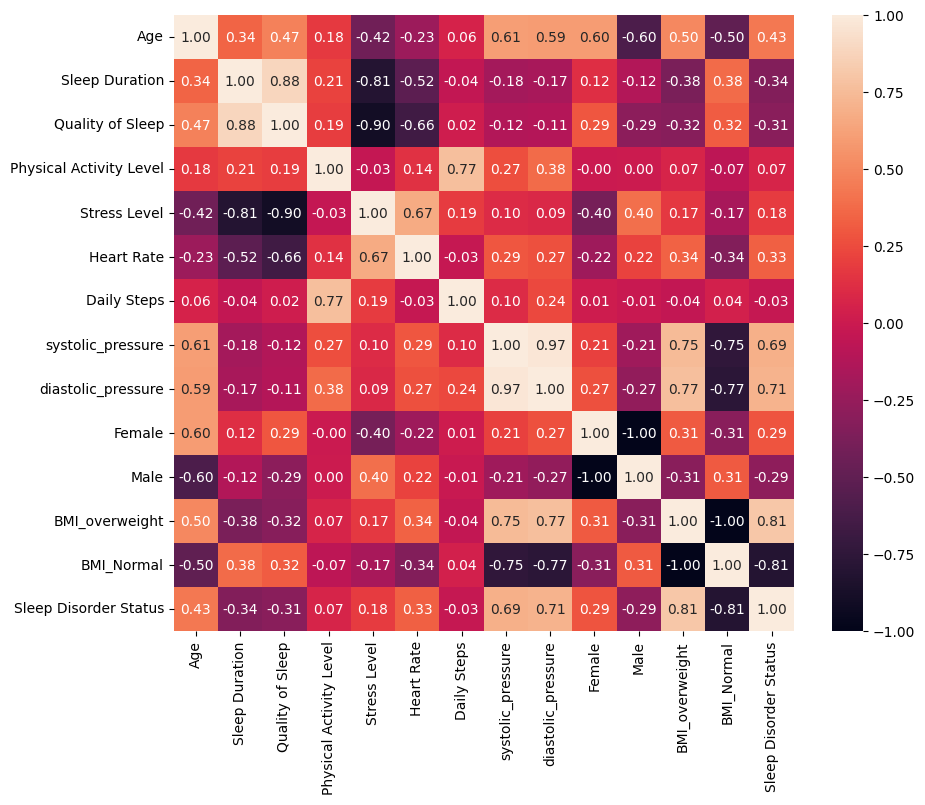

In [65]:
plt.figure(figsize=(10, 8))
sns.heatmap(df1.corr(), annot=True, fmt=".2f")
plt.show()

# MODEL TRAINING AND MODEL SELECTION

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score


X = df1.drop('Quality of Sleep', axis = 1)
Y  = df1['Quality of Sleep']

In [79]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [80]:
lasso_reg = LinearRegression()
lasso_reg = lasso_reg.fit(X_train, Y_train)
lasso_reg.score(X_test, Y_test)

0.9586484591436434

In [81]:
lasso_reg = Lasso()
lasso_reg = lasso_reg.fit(X_train, Y_train)
lasso_reg.score(X_test, Y_test)

0.705737270585743